In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from white_brush.io import read_image, write_image
from white_brush.colors.color_balance import balance_color
from white_brush.colors.color_extraction import extract_background_colors, hsv_distance_threshold, adaptive_threshold
from white_brush.colors.conversion import *
from white_brush.colors.morphology import *

In [3]:
def show_img(img, cmap="Greys"):
    if img.ndim >= 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=cmap)
    plt.axis("off")
    plt.gcf().set_size_inches(20, 10)

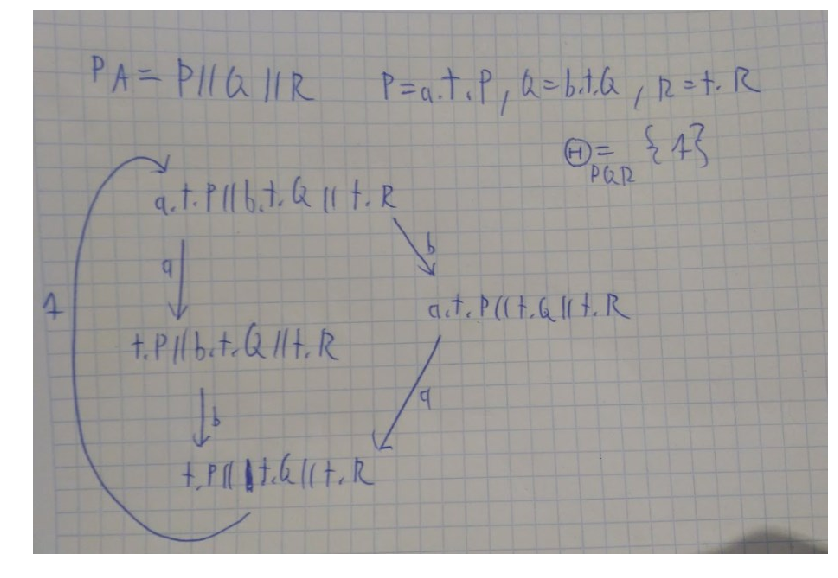

In [4]:
orig_img = read_image("../test_images/01.png")
show_img(orig_img)

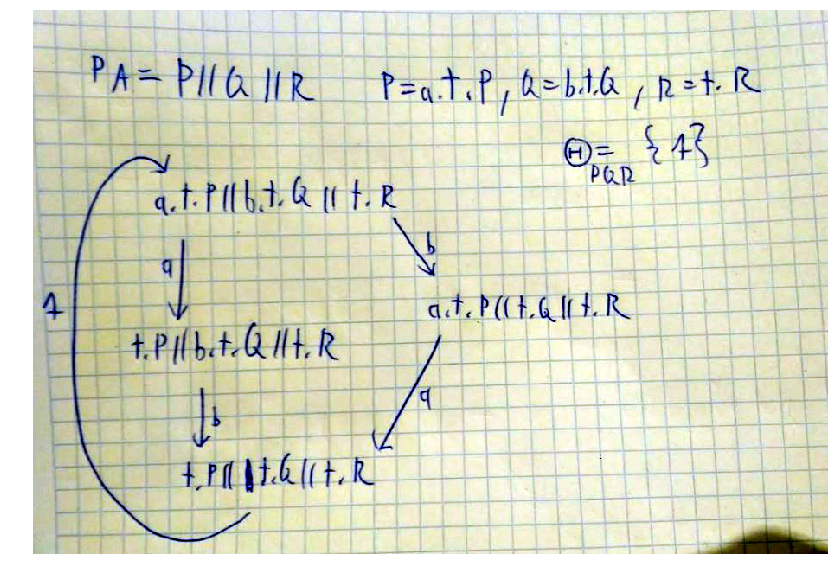

In [5]:
img = balance_color(orig_img)
show_img(img)

### HSV Thresholding

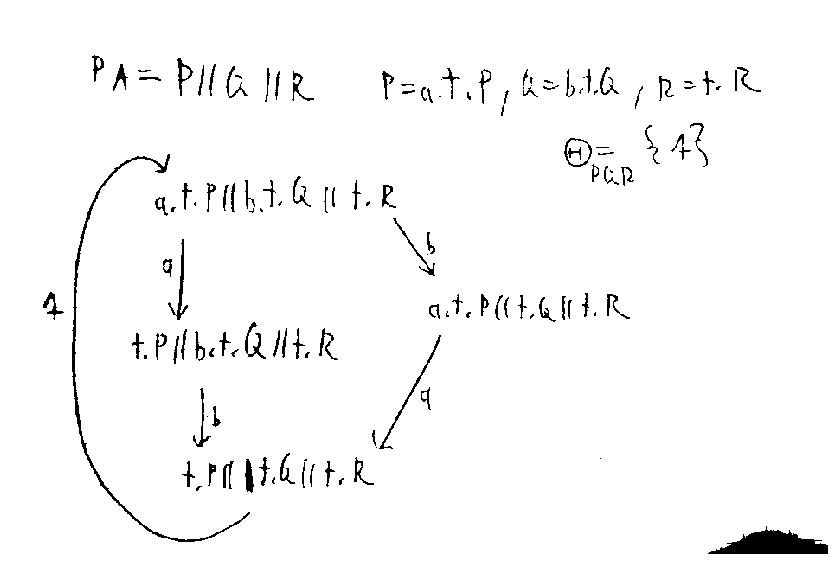

In [6]:
hsv_thresh = hsv_distance_threshold(img)
show_img(hsv_thresh)

#### Dilate HSV result

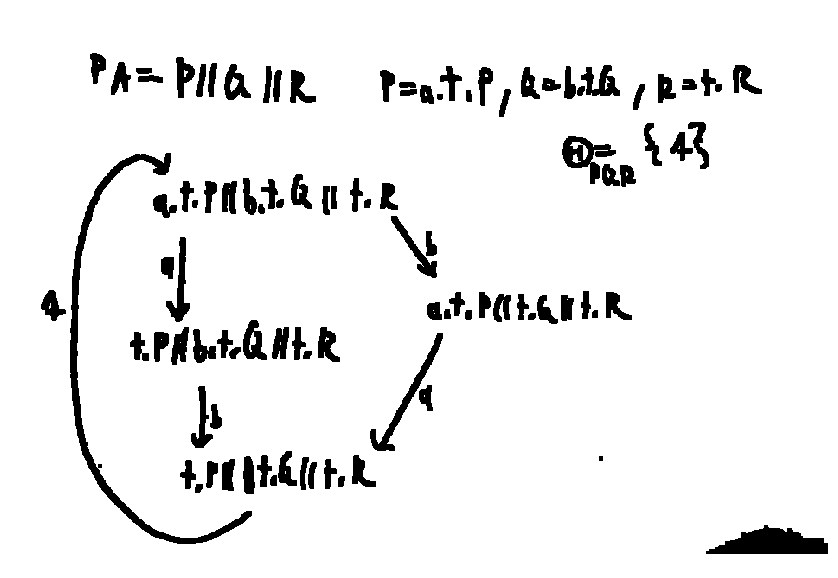

In [7]:
dilated_hsv_thresh = dilate(hsv_thresh, 5)
show_img(dilated_hsv_thresh)

### Adaptive Thresholding

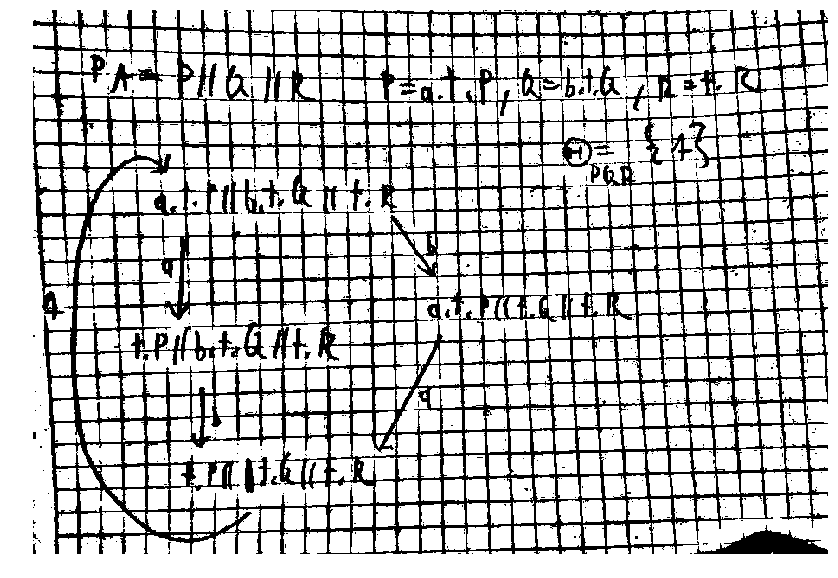

In [8]:
adaptive_thresh = adaptive_threshold(img, 51, 3)
show_img(adaptive_thresh)

### Combine HSV Distance + Adaptive Thresh

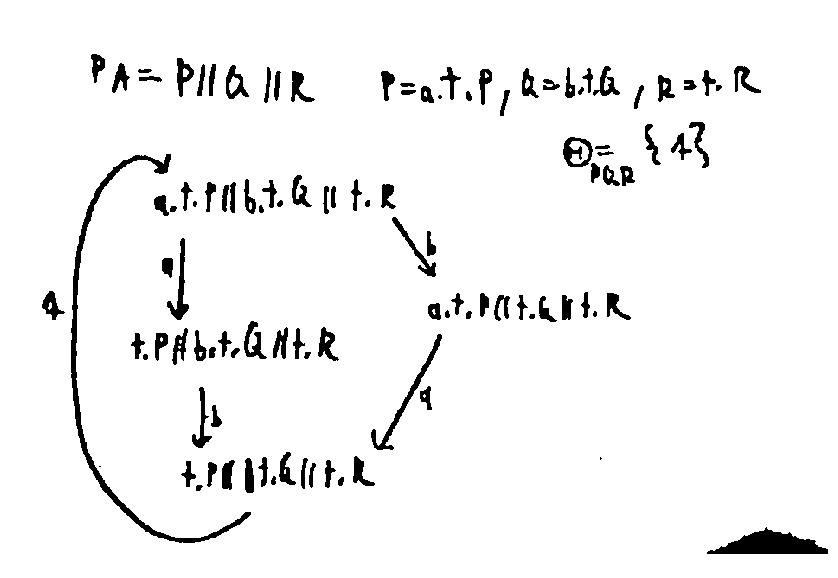

In [9]:
hsv_fg = dilated_hsv_thresh
adaptive_fg = adaptive_thresh
adaptive_fg = dilate(adaptive_thresh, 3)
combined_thresh = hsv_fg & adaptive_fg
combined_thresh = erode(combined_thresh, 3, kernel_shape="ellipse")
combined_thresh = smooth(combined_thresh, 3, kernel_shape="ellipse")
show_img(combined_thresh)

## Insert colors

In [10]:
foreground_mask = combined_thresh

In [11]:
colors = orig_img[foreground_mask]
colors &= 0b11110000

In [12]:
from mpl_toolkits.mplot3d import Axes3D

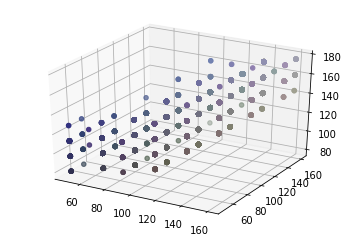

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(colors[:,0], colors[:,1], colors[:,2], c=colors.astype(np.float)/255);

In [14]:
from white_brush.colors.calc_colors import choose_representative_colors

In [15]:
rep_colors, color_mapping = choose_representative_colors(colors)
rep_colors = rep_colors.astype(np.float)
rep_colors  /= 255

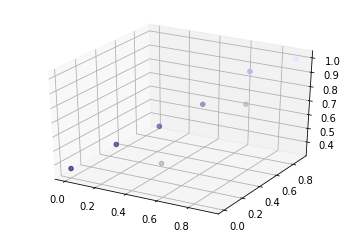

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(rep_colors[:,0], rep_colors[:,1], rep_colors[:,2], c=rep_colors)


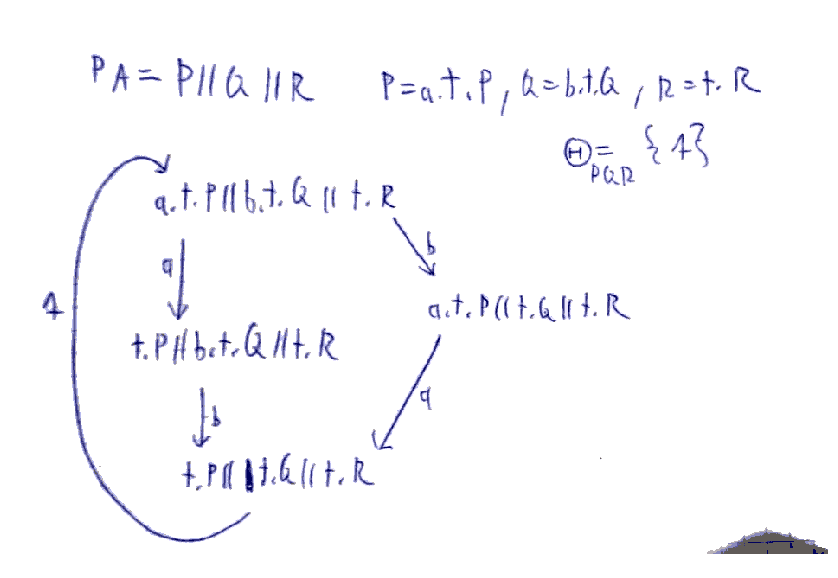

In [17]:
out_img = np.copy(orig_img).astype(np.float) / 255
out_img[~combined_thresh] = [1., 1., 1.] # set background white
out_img[foreground_mask, :] = rep_colors[color_mapping]
show_img(out_img)